In [11]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import label
np.random.seed(42)

L = ((2021111021 % 5) + 1) * 100

# Q1

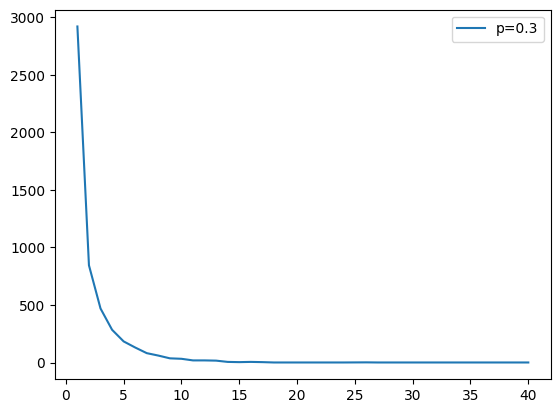

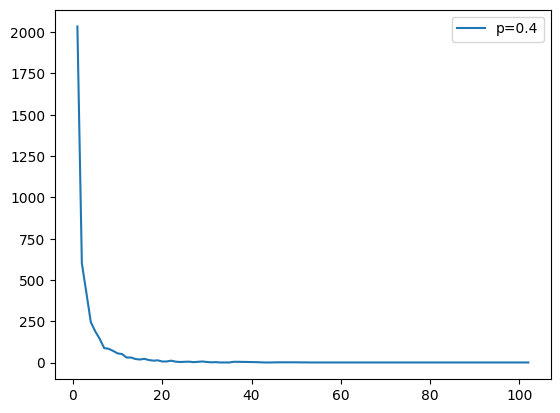

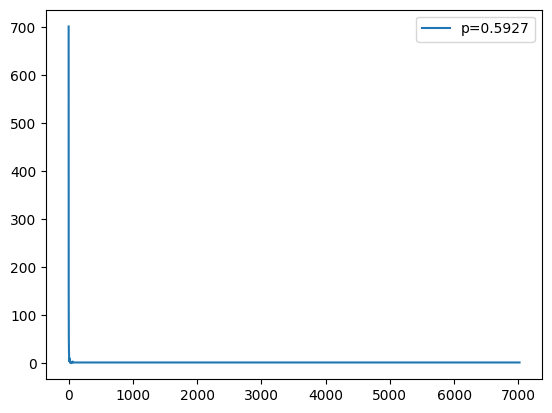

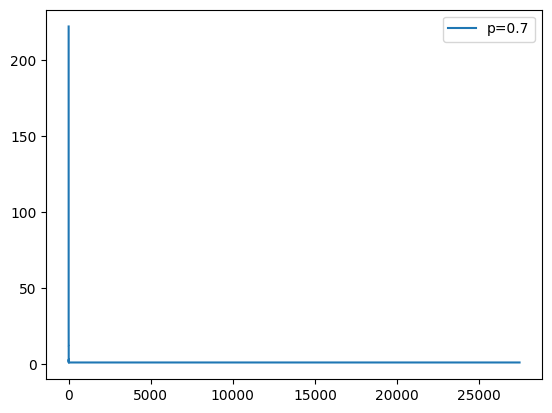

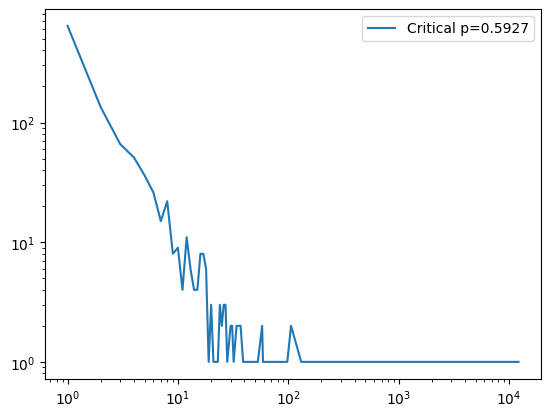

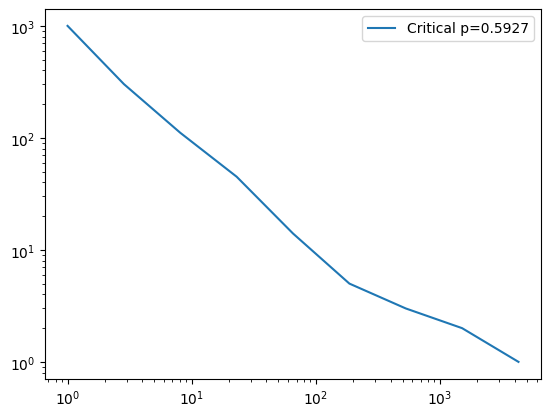

Exponent of the power law at critical probability at p=0.5927: 0.6498934027127613


In [12]:
def get_cluster_size(lattice):
    labels, _ = label(lattice)

    labels = labels.reshape(-1)

    cluster_sizes = np.bincount(labels)[1:]
    return cluster_sizes

p_value = [0.3, 0.4, 0.5927, 0.7]

for p in p_value:
    lattice = np.random.choice([0, 1], size=(L, L), p=[1-p, p])

    cluster_sizes = get_cluster_size(lattice)

    unique_sizes, counts = np.unique(cluster_sizes, return_counts=True)

    plt.figure()
    plt.plot(unique_sizes, counts, label=f'p={p}')
    plt.legend()
    plt.show()

critical_lattice = np.random.choice([0, 1], size=(L, L), p=[0.4073, 0.5927])

critical_cluster_sizes = get_cluster_size(critical_lattice)

unique_sizes, counts = np.unique(critical_cluster_sizes, return_counts=True)

plt.figure()
plt.loglog(unique_sizes, counts, label='Critical p=0.5927')
plt.legend()
plt.show()

def log_binning(cluster_sizes, cluster_freqs):
    max_cluster_size = np.max(cluster_sizes)

    log_cluster_sizes = np.logspace(0, np.log10(max_cluster_size), num=10)

    log_cluster_freqs = np.zeros_like(log_cluster_sizes)

    for i, size in enumerate(log_cluster_sizes):
        mask = (cluster_sizes >= size) & (cluster_sizes < size * 10)
        log_cluster_freqs[i] = np.sum(cluster_freqs[mask])

    non_zero_mask = log_cluster_freqs > 0

    log_cluster_sizes = log_cluster_sizes[non_zero_mask]
    log_cluster_freqs = log_cluster_freqs[non_zero_mask]

    return log_cluster_sizes, log_cluster_freqs

log_cluster_sizes, log_cluster_freqs = log_binning(unique_sizes, counts)

plt.figure()
plt.loglog(log_cluster_sizes, log_cluster_freqs, label='Critical p=0.5927')
plt.legend()
plt.show()

# Get exponent of the power law at critical probability at p=0.5927
x = np.log(unique_sizes)
y = np.log(counts)

slope = np.polyfit(x, y, 1)[0]

print(f'Exponent of the power law at critical probability at p=0.5927: {-slope}')

# Q2

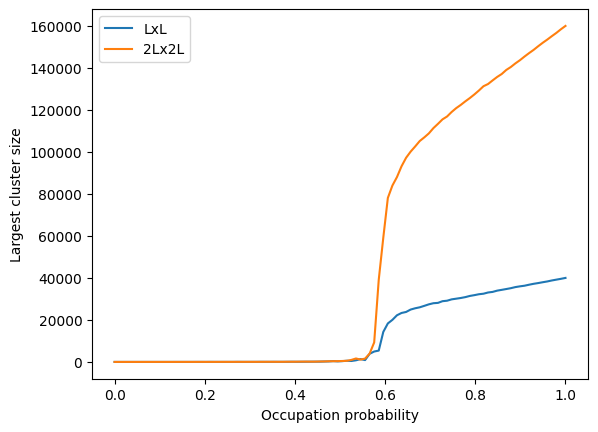

In [13]:
p_values = np.linspace(0, 1, 100)

largest_clusters = []

for p in p_values:
    lattice = np.random.choice([0, 1], size=(L, L), p=[1-p, p])

    cluster_sizes = get_cluster_size(lattice)

    largest_cluster = np.max(cluster_sizes) if len(cluster_sizes) > 0 else 0

    largest_clusters.append(largest_cluster)

plt.figure()
plt.plot(p_values, largest_clusters, label='LxL')
plt.xlabel('Occupation probability')
plt.ylabel('Largest cluster size')

largest_clusters = []

for p in p_values:
    lattice = np.random.choice([0, 1], size=(2*L, 2*L), p=[1-p, p])

    cluster_sizes = get_cluster_size(lattice)

    largest_cluster = np.max(cluster_sizes) if len(cluster_sizes) > 0 else 0

    largest_clusters.append(largest_cluster)

plt.plot(p_values, largest_clusters, label='2Lx2L')
plt.legend()
plt.show()

# Q3

In [14]:
ind_pop = [49386799, 1383727, 31169272, 104099452, 25545198, 1458545, 60439692, 25351462, 6864602, 32988134, 61095297, 33406061, 72626809, 112374333, 2721756, 2966889, 1097206, 1978502, 41974218, 27743338, 68548437, 610577, 72147030, 35193978, 3673917, 199812341, 10086292, 91276115, 380581, 1055450, 586956, 16787941, 1247953, 1247953, 64473, 1247953]
usa_pop = [4849377, 736732, 6731484, 2966369, 38802500, 5355866, 3596677, 935614, 658893, 19893297, 10097343, 1419561, 1634464, 12880580, 6596855, 3107126, 2904021, 4413457, 4649676, 1330089, 5976407, 6745408, 9909877, 5457173, 2994079, 6063589, 1023579, 1881503, 2839099, 1326813, 8938175, 2085572, 19746227, 9943964, 739482, 11594163, 3878051, 3970239, 12787209, 1055173, 4832482, 853175, 6549352, 26956958, 2942902, 626562, 8326289, 7061530, 1850326, 5757564, 584153]

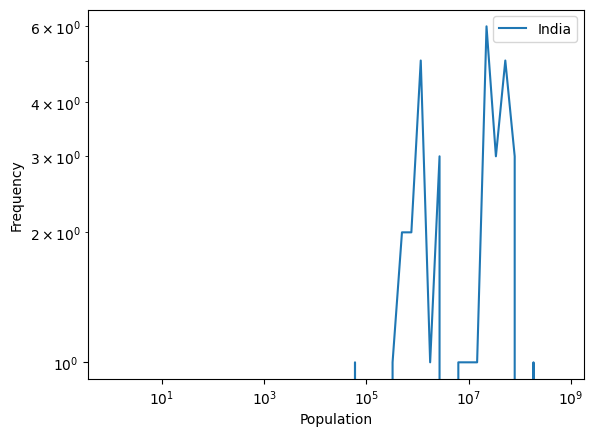

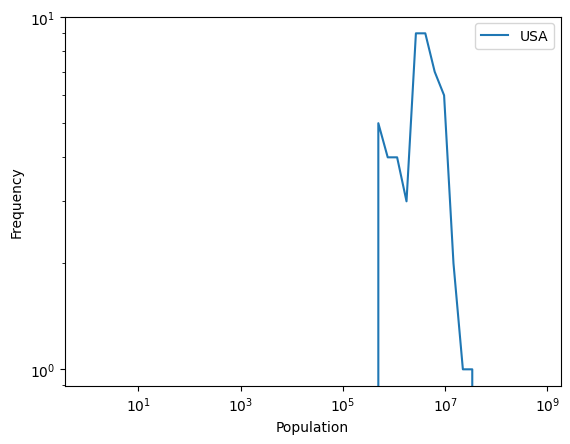

In [15]:
def get_bins(population):
    bins = np.logspace(0, 9, 50)
    hist, _ = np.histogram(population, bins=bins)
    return bins, hist

bins, hist = get_bins(ind_pop)

# Plot the loglog plot
plt.figure()
plt.loglog(bins[:-1], hist, label='India')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()
plt.show()

bins, hist = get_bins(usa_pop)

# Plot the loglog plot
plt.figure()
plt.loglog(bins[:-1], hist, label='USA')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()
plt.show()


- As we can see, the loglog scale plots of the distributions of the populations of both countries are not straight lines with decreasing slopes and hence, both of them do not follow the power law distribution.